In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [53]:
# read data 
df = pd.read_csv("../input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv")
# getting all columns displayed 
pd.set_option("display.max_columns", None)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


# Exploratory data analysis 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [55]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data cleaning 

In [56]:
df.duplicated().sum()

0

In [57]:
# drop useless columns 
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [58]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

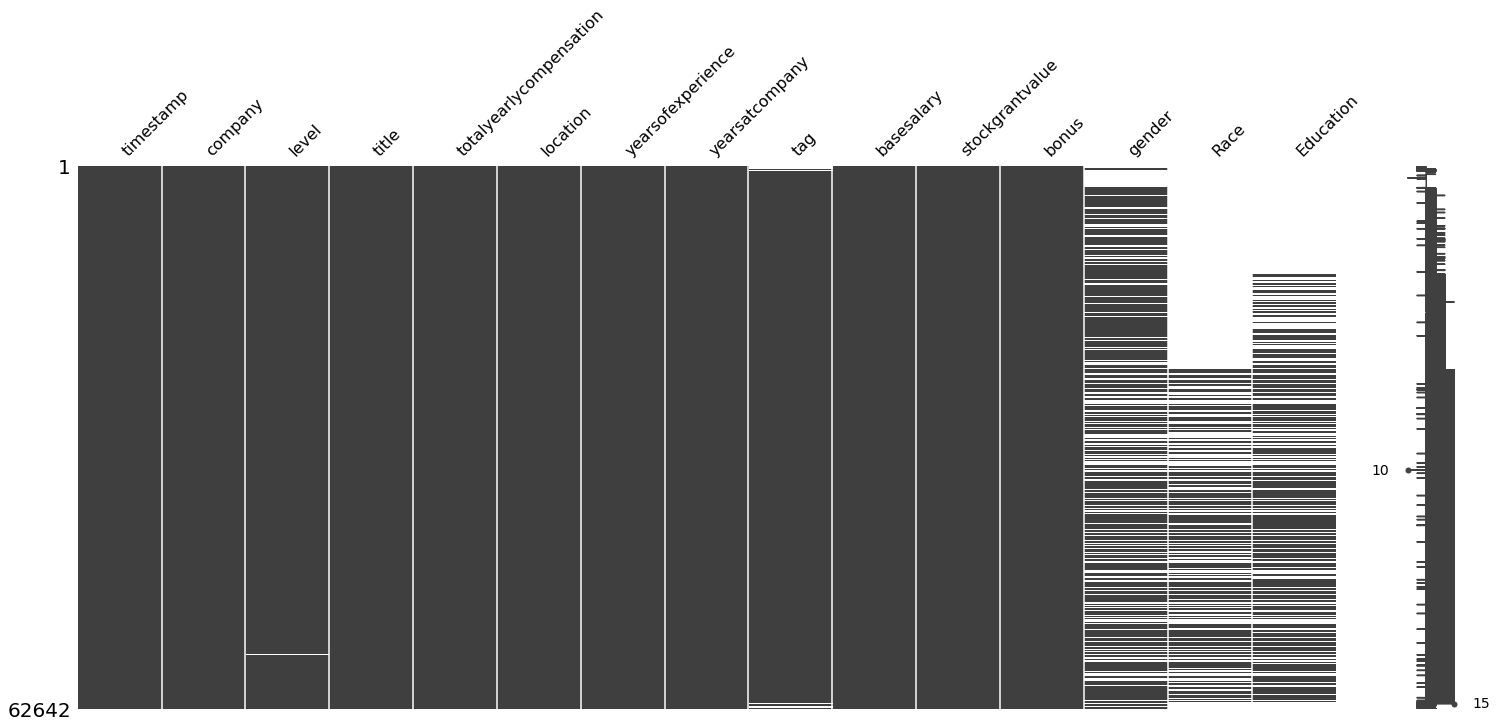

In [59]:
# checking missing values
msno.matrix(df)
plt.show()

In [60]:
df = df.dropna(subset=['company', 'level','tag'])

### Gender

In [61]:
df['gender'].unique()

array(['Male', 'Female', nan, 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [62]:
values = ['Other', 'Title: Senior Software Engineer']
df = df[df.gender.isin(values) == False]
df['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [63]:
gender_fill_list = ['Female' , 'Male']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(gender_fill_list , size = len(df.index) + 2000)))

In [64]:
df['gender'].isna().sum()

0

In [65]:
df['gender'].value_counts()

Male      44689
Female    16582
Name: gender, dtype: int64

### Race

In [66]:
df['Race'].unique()

array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [67]:
race_fill_list = ['White' , 'Asian', 'Black', 'Two Or More', 'Hispanic']
df['Race'] = df['Race'].fillna(pd.Series(np.random.choice(race_fill_list , size = len(df.index) + 2000)))

In [68]:
df['Race'].isna().sum()

0

In [69]:
df['Race'].value_counts()

Asian          19507
White          15651
Hispanic        8952
Two Or More     8649
Black           8512
Name: Race, dtype: int64

### Education


In [70]:
df['Education'].unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [71]:
edu_fill_list = ['PhD' , "Master's Degree", "Bachelor's Degree", 'Some College', 'Highschool']
df['Education'] = df['Education'].fillna(pd.Series(np.random.choice(edu_fill_list , size = len(df.index) + 2000)))

In [72]:
df['Education'].isna().sum()

0

In [73]:
df['Education'].value_counts()

Master's Degree      21492
Bachelor's Degree    18705
PhD                   7918
Some College          6606
Highschool            6550
Name: Education, dtype: int64

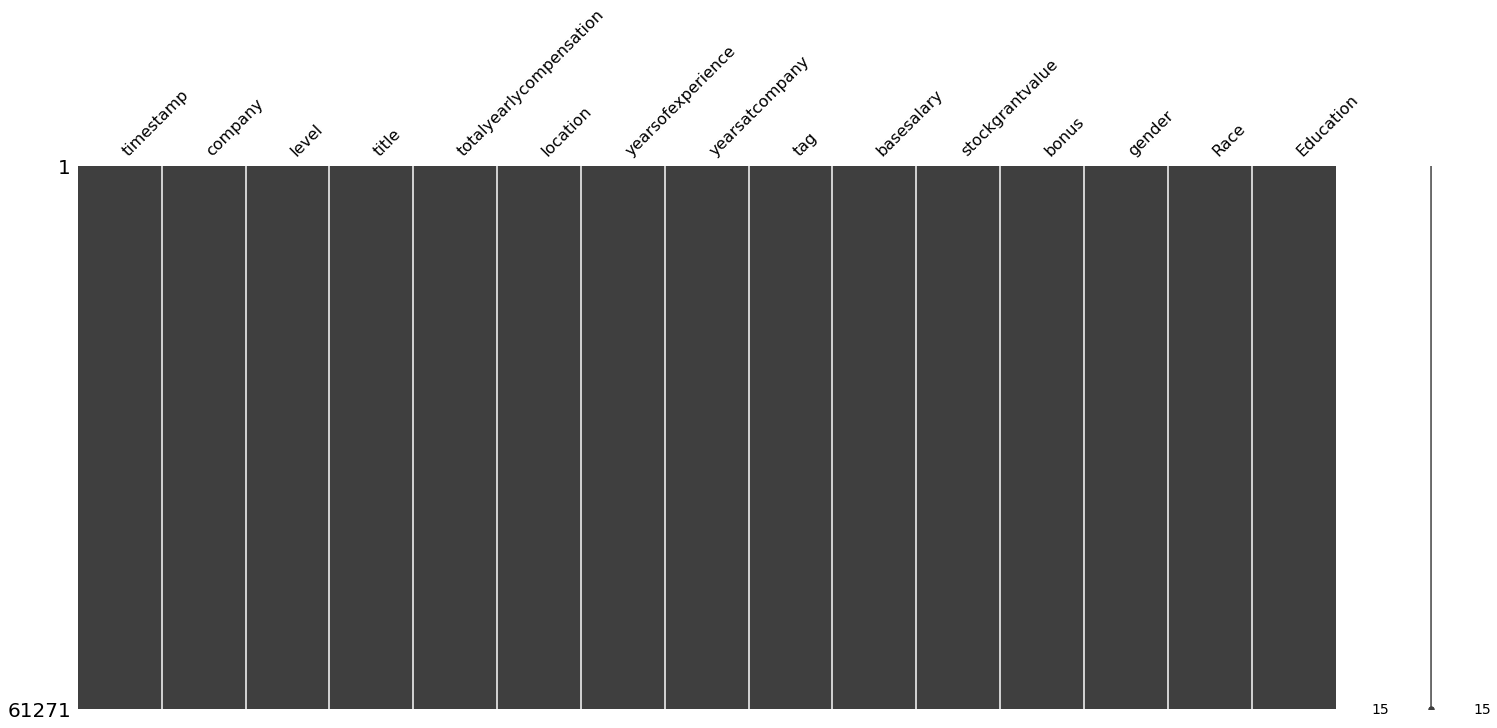

In [74]:
# checking missing values
msno.matrix(df)
plt.show()

In [75]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,6/3/2018 13:58:20,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Full Stack,128000.0,13000.0,19200.0,Male,Asian,Master's Degree
410,6/4/2018 0:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Distributed Systems (Back-End),206000.0,134000.0,0.0,Male,Two Or More,Master's Degree
411,6/4/2018 19:56:27,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Embedded Systems,0.0,0.0,0.0,Male,Black,Bachelor's Degree
412,6/4/2018 20:27:58,Splunk,P2,Software Engineer,160000,"Seattle, WA",5.00,3.00,Full Stack,0.0,0.0,0.0,Male,Two Or More,PhD
413,6/5/2018 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Distributed Systems (Back-End),116000.0,65000.0,17000.0,Male,Hispanic,PhD


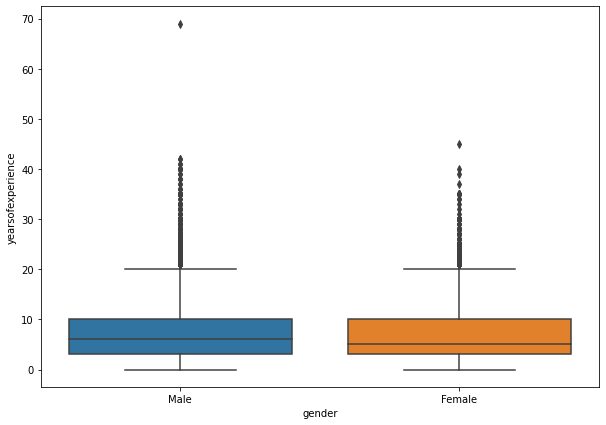

In [76]:
plt.figure(figsize=(10,7))
sns.boxplot(x="gender", y="yearsofexperience", data=df)
plt.show()

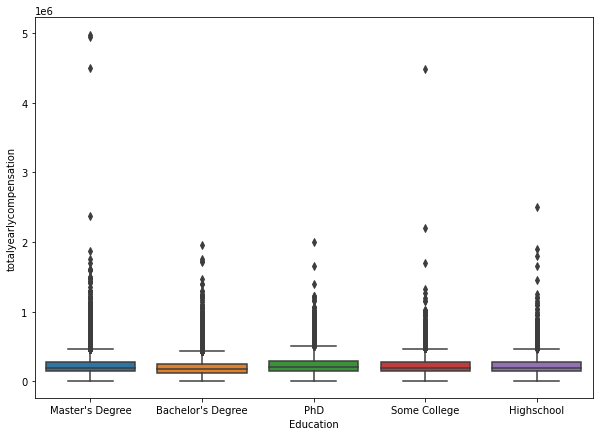

In [77]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Education", y="totalyearlycompensation", data=df)
plt.show()

In [78]:
df[ (df['totalyearlycompensation'] > 4.000000e+06)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
61967,8/20/2019 15:35:10,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,ML / AI,850000.0,3750.0,350000.0,Male,Black,Master's Degree
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,Asian,Master's Degree
61990,7/2/2021 8:43:37,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,Full Stack,350000.0,4000.0,140000.0,Male,Asian,Some College
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,4400.0,200000.0,Male,Asian,Master's Degree


**these are not outliers so no need to clean it**

In [79]:
outlier = df[ (df['yearsofexperience'] == 69) | (df['basesalary'] == 1.620000e+06) ].index
df.drop(outlier , inplace=True)
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.126900e+04,61269.000000,61269.000000,61269.000000,61269.000000,61269.000000
mean,2.157453e+05,7.204150,2.702810,136642.689713,50913.551049,19251.292085
std,1.379302e+05,5.838297,3.257733,60595.455176,79242.933716,26362.220933
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,107000.000000,0.000000,1000.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,25000.000000,14000.000000
75%,2.630000e+05,10.000000,4.000000,170000.000000,65000.000000,26000.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,1000000.000000,1000000.000000


In [80]:
df = df.astype({"basesalary":'int', "stockgrantvalue":'int', "bonus":'int'}) 

In [81]:
df.yearsofexperience = df.yearsofexperience.round().astype(int)
df.yearsatcompany = df.yearsatcompany.round().astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61269 entries, 409 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                61269 non-null  object
 1   company                  61269 non-null  object
 2   level                    61269 non-null  object
 3   title                    61269 non-null  object
 4   totalyearlycompensation  61269 non-null  int64 
 5   location                 61269 non-null  object
 6   yearsofexperience        61269 non-null  int64 
 7   yearsatcompany           61269 non-null  int64 
 8   tag                      61269 non-null  object
 9   basesalary               61269 non-null  int64 
 10  stockgrantvalue          61269 non-null  int64 
 11  bonus                    61269 non-null  int64 
 12  gender                   61269 non-null  object
 13  Race                     61269 non-null  object
 14  Education                61269 non-n

In [83]:
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,6/3/2018 13:58:20,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Asian,Master's Degree
410,6/4/2018 0:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Master's Degree
411,6/4/2018 19:56:27,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Black,Bachelor's Degree
412,6/4/2018 20:27:58,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Two Or More,PhD
413,6/5/2018 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10,1,Distributed Systems (Back-End),155000,150000,22000,Male,Two Or More,Some College
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2,2,Full Stack,146900,73200,16000,Male,Black,Some College
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,25000,20000,Male,Asian,Bachelor's Degree
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,57000,29000,Female,Two Or More,Bachelor's Degree


In [84]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,2018-06,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Asian,Master's Degree
410,2018-06,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Master's Degree
411,2018-06,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Black,Bachelor's Degree
412,2018-06,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Two Or More,PhD
413,2018-06,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,PhD


In [85]:
df['title'].value_counts()

Software Engineer               40249
Product Manager                  4510
Software Engineering Manager     3491
Data Scientist                   2545
Hardware Engineer                2183
Product Designer                 1488
Technical Program Manager        1370
Solution Architect               1149
Management Consultant             970
Business Analyst                  872
Marketing                         699
Mechanical Engineer               484
Sales                             458
Recruiter                         446
Human Resources                   355
Name: title, dtype: int64

In [86]:
df['company'].value_counts()

Amazon               7919
Microsoft            5052
Google               4215
Facebook             2924
Apple                1969
                     ... 
Quest Diagnostics       1
DISH                    1
capgemini               1
juniper                 1
VmWare                  1
Name: company, Length: 1622, dtype: int64

In [87]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.422443,0.165705,0.684627,0.787714,0.493790
yearsofexperience,0.422443,1.000000,0.522022,0.380107,0.297263,0.263810
yearsatcompany,0.165705,0.522022,1.000000,0.147456,0.093080,0.112044
basesalary,0.684627,0.380107,0.147456,1.000000,0.485537,0.404436
stockgrantvalue,0.787714,0.297263,0.093080,0.485537,1.000000,0.254042
bonus,0.493790,0.263810,0.112044,0.404436,0.254042,1.000000


In [88]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,2018-06,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Asian,Master's Degree
410,2018-06,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Master's Degree
411,2018-06,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Black,Bachelor's Degree
412,2018-06,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Two Or More,PhD
413,2018-06,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,PhD


## modeling

### label encoding 

In [89]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [90]:
df_lr = df[['title', 'yearsofexperience', 'totalyearlycompensation']]
df_lr.head()

,title,yearsofexperience,totalyearlycompensation
409,Software Engineer,1,160500
410,Software Engineering Manager,16,340000
411,Software Engineer,15,240000
412,Software Engineer,5,160000
413,Software Engineer,0,208000


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

title_le = LabelEncoder()

In [92]:
df_lr['title'] = title_le.fit_transform(df_lr['title'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_lr.head()

,title,yearsofexperience,totalyearlycompensation
409,11,1,160500
410,12,16,340000
411,11,15,240000
412,11,5,160000
413,11,0,208000


### Train and test split

In [94]:
x = df_lr.drop(['totalyearlycompensation'] , axis = 1).values
y = df_lr['totalyearlycompensation'].values

In [95]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

scaling

In [96]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Linear Regression model

In [97]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [98]:
lr.fit(x_train , y_train)

LinearRegression()

In [99]:
predictions = lr.predict(x_test)


In [100]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))